In [3]:
import argparse

import pprint

import sys

import os

import subprocess

import json

import spotipy

import spotipy.util as util

import pandas as pd

from spotipy.oauth2 import SpotifyClientCredentials

client_id= "a82ef03cc3f44042b0f07c3c9220f175"

client_secret= "e049de0fb2a94fa9990ca6565ac7a053"

redirect_uri='http://localhost:8888/callback'

username='22am6rooejanltf555ip2dhxi'

playlist = '15djFUHlAd4UdrNdZ3qbuR'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

scope = 'user-library-read playlist-read-private'

try:
    token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
    sp=spotipy.Spotify(auth= token)
    print("Foi")
except:
    print('Token is not accesible for ' + username)
    
def get_playlist_content(username, playlist_id, sp):
    offset = 0
    songs = []
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None,limit=100, offset=offset, market=None)
        songs += content['items']
        if content['next'] is not None:
            offset += 100
        else:
            break
        with open('{}-{}'.format(username, playlist_id), 'w') as outfile:
            json.dump(songs, outfile)

def get_playlist_audio_features(username, playlist_id, sp):
    offset = 0
    songs = []
    items = []
    ids = []
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        songs += content['items']
        if content['next'] is not None:
            offset += 100
        else:
            break
        for i in songs:
            ids.append(i['track']['id'])
            index = 0
            audio_features = []
            while index < len(ids):
                audio_features += sp.audio_features(ids[index:index + 50])
                index += 50
                features_list = []
                for features in audio_features:
                    features_list.append([features['energy'], features['liveness'],
                    features['tempo'], features['speechiness'],
                    features['acousticness'], features['instrumentalness'],
                    features['time_signature'], features['danceability'],
                    features['key'], features['duration_ms'],
                    features['loudness'], features['valence'],
                    features['mode'], features['type'],
                    features['uri'],])
                    df = pd.DataFrame(features_list, columns=['energy', 'liveness','tempo', 'speechiness','acousticness', 'instrumentalness',
                    'time_signature', 'danceability','key', 'duration_ms', 'loudness','valence', 'mode', 'type', 'uri'])
                    df.to_csv('{}-{}.csv'.format(username, playlist_id), index=False)

def get_user_playlist(username, sp):
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        print("Name: {}, Number of songs: {}, Playlist ID: {} ".
        format(playlist['name'].encode('utf8'),
        playlist['tracks']['total'],
        playlist['id']))
        
        
get_playlist_content(username, playlist, sp)
get_playlist_audio_features(username, playlist, sp)
get_user_playlist(username, sp)

Foi


ConnectionError: HTTPSConnectionPool(host='api.spotify.com', port=443): Max retries exceeded with url: /v1/audio-features/?ids=3ZFTkvIE7kyPt6Nu3PEa7V,4yQmDtjax2Ye9wY8EPAO1x,7qrMWXNwE1aD1o1sBnyIAh,7EmGUiUaOSGDnUUQUDrOXC,7iz4bsfPOrK9wzhXkgUfya,6MNGxu8MprKGkchUchkJsy,5mMGlT6afZ4yQv36paf0tz,2hdy9Wt9qp7M7d0U3ossu2,7I4zJamsReVjDMmx8GkH5r,6kex4EBAj0WHXDKZMEJaaF,7fYbFYt7X4FZvuJJC90EX0,60RWYBk24Z6lHxMcWD0oh0,2KjpWqvSKoQh0XIAywplWn,2Gj5CXGxbSTqNRnLVPx6R3,7s0YfJE6hNNYq9BV26iCw6,25qfFpoGhk9Njgu5nl36sS,2meEiZKWkiN28gITzFwQo5,5OCJzvD7sykQEKHH7qAC3C,4e5rVnBWDSwYLSXkMO6ljE,1r299qCKBLgUS9XJ9m1kEx,0aYUqsvZG7bAslrUkd9Z0g,3UygY7qW2cvG9Llkay6i1i,7hlXiMxN81uctLsvbtHZ8x,0STK94RxUulYqWzwFlyAb5,2fQxE0jVrjNMT9oJAXtSJR,6LoQHIo74tOzQ8EsLEkhgF,5sra5UY6sD658OabHL3QtI,4YCCwOhHTQcrmWi5ofmUxN,2gam98EZKrF9XuOkU13ApN,5l3CML2OnzfNs5RfVgbcLt,1WniHvhq9zTkny0WvGXX8o,3RaqIAipLoQLVVNm41IMnJ,4cS2HQ6jK80vqdY9ofpztx,7HfhXeqUP6rwesTrqDoGHt,4ZOyH6KjomjlqCz3oFqglr,2SUQGI9ztmp0PQd1J8SVHx,2oxtQ84p1j5GmyzmD50Lq0,46RpQoZPZI5nBzu22ARmNL,5eQ9IwVa9EodrmIItRQpaA,2FY7b99s15jUprqC0M5NCT,56ZrTFkANjeAMiS14njg4E,6O20JhBJPePEkBdrB5sqRx,2rk4s5NBhtHhhJIfjoaWES,1hBM2D1ULT3aeKuddSwPsK,6mWIBbMx3BCgeqo7RvLuDP,7nXq1vaZiz7PdbfojpPjW5,7Av1FZIoT4N1okN5nuk12u,2zFF6jG5hQArbzcXz3KUWk,0TDLuuLlV54CkRRUOahJb4,6kwAbEjseqBob48jCus7Sz (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000E7969F0780>: Failed to establish a new connection: [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu\r\ncorretamente após um período de tempo ou a conexão estabelecida falhou\r\nporque o host conectado não respondeu'))

In [ ]:
filename = 'ForGame.csv'
df1 = pd.read_csv(filename)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
energy              100 non-null float64
liveness            100 non-null float64
tempo               100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
time_signature      100 non-null int64
danceability        100 non-null float64
key                 100 non-null int64
duration_ms         100 non-null int64
loudness            100 non-null float64
valence             100 non-null float64
mode                100 non-null int64
type                100 non-null object
uri                 100 non-null object
dtypes: float64(9), int64(4), object(2)
memory usage: 11.8+ KB


In [55]:
df1.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.711130,0.167559,120.022960,0.094851,0.142155,0.004963,3.930000,0.638693,6.290000,213477.820000,-5.345150,0.482493,0.330000
std,0.158025,0.121643,30.133828,0.084634,0.193526,0.024759,0.325825,0.156394,3.400223,31812.577588,1.810015,0.235233,0.472582
min,0.172000,0.035300,49.452000,0.025300,0.000235,0.000000,3.000000,0.099300,0.000000,138592.000000,-11.618000,0.039900,0.000000
25%,0.613750,0.087700,98.769000,0.043475,0.011700,0.000000,4.000000,0.546750,4.000000,192908.750000,-6.128250,0.292250,0.000000
50%,0.739000,0.117500,117.471500,0.060100,0.041250,0.000000,4.000000,0.649000,6.500000,213620.000000,-5.311000,0.444000,0.000000
75%,0.824500,0.211750,131.738250,0.104000,0.217750,0.000050,4.000000,0.757000,9.000000,234116.000000,-4.098250,0.656500,1.000000
max,0.972000,0.611000,212.117000,0.390000,0.904000,0.191000,5.000000,0.978000,11.000000,299213.000000,-1.100000,0.964000,1.000000


In [47]:
df1.sample(1)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
56,0.775,0.0702,180.054,0.0887,0.0117,0.191,4,0.695,11,141317,-5.041,0.869,0,audio_features,spotify:track:05rJdH2MRLJ3sQoEUO78qs


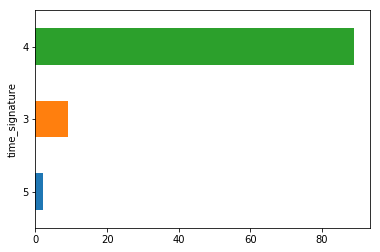

In [51]:
df1.groupby('time_signature').size().sort_values().plot(kind='barh')

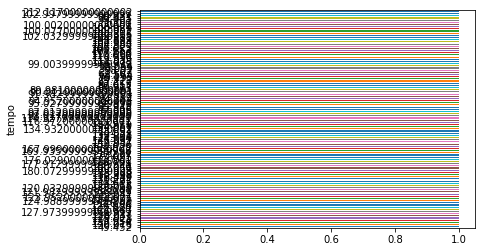

In [56]:
df1.groupby('tempo').size().sort_values().plot(kind='barh')

In [1]:
df1.query('key = 3')['key'].value_counts().head().plot(kind='hist')

NameError: name 'df' is not defined